# 准备环境

In [ ]:
# !git clone https://github.com/open-mmlab/mmyolo.git

In [2]:
import os
os.chdir('mmyolo')

In [3]:
# !pip install -r requirements/albu.txt

In [4]:
# !mim install -v -e .

In [5]:
# 裁剪图片
import cv2

img = cv2.imread('../mmdetection/data/test_drink/cola.jpg')
h,w=img.shape[:2]
resized_img = cv2.resize(img, (640, 640))
cv2.imwrite('resized_cola.jpg', resized_img)

True

# 可视化

In [8]:
# 可视化 backbone 输出的 3 个通道
!python demo/featmap_vis_demo.py \
      resized_cola.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean

resized_cola.jpg
../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py
../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
06/11 22:34:39 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/11 22:34:39 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/11 22:34:43 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until

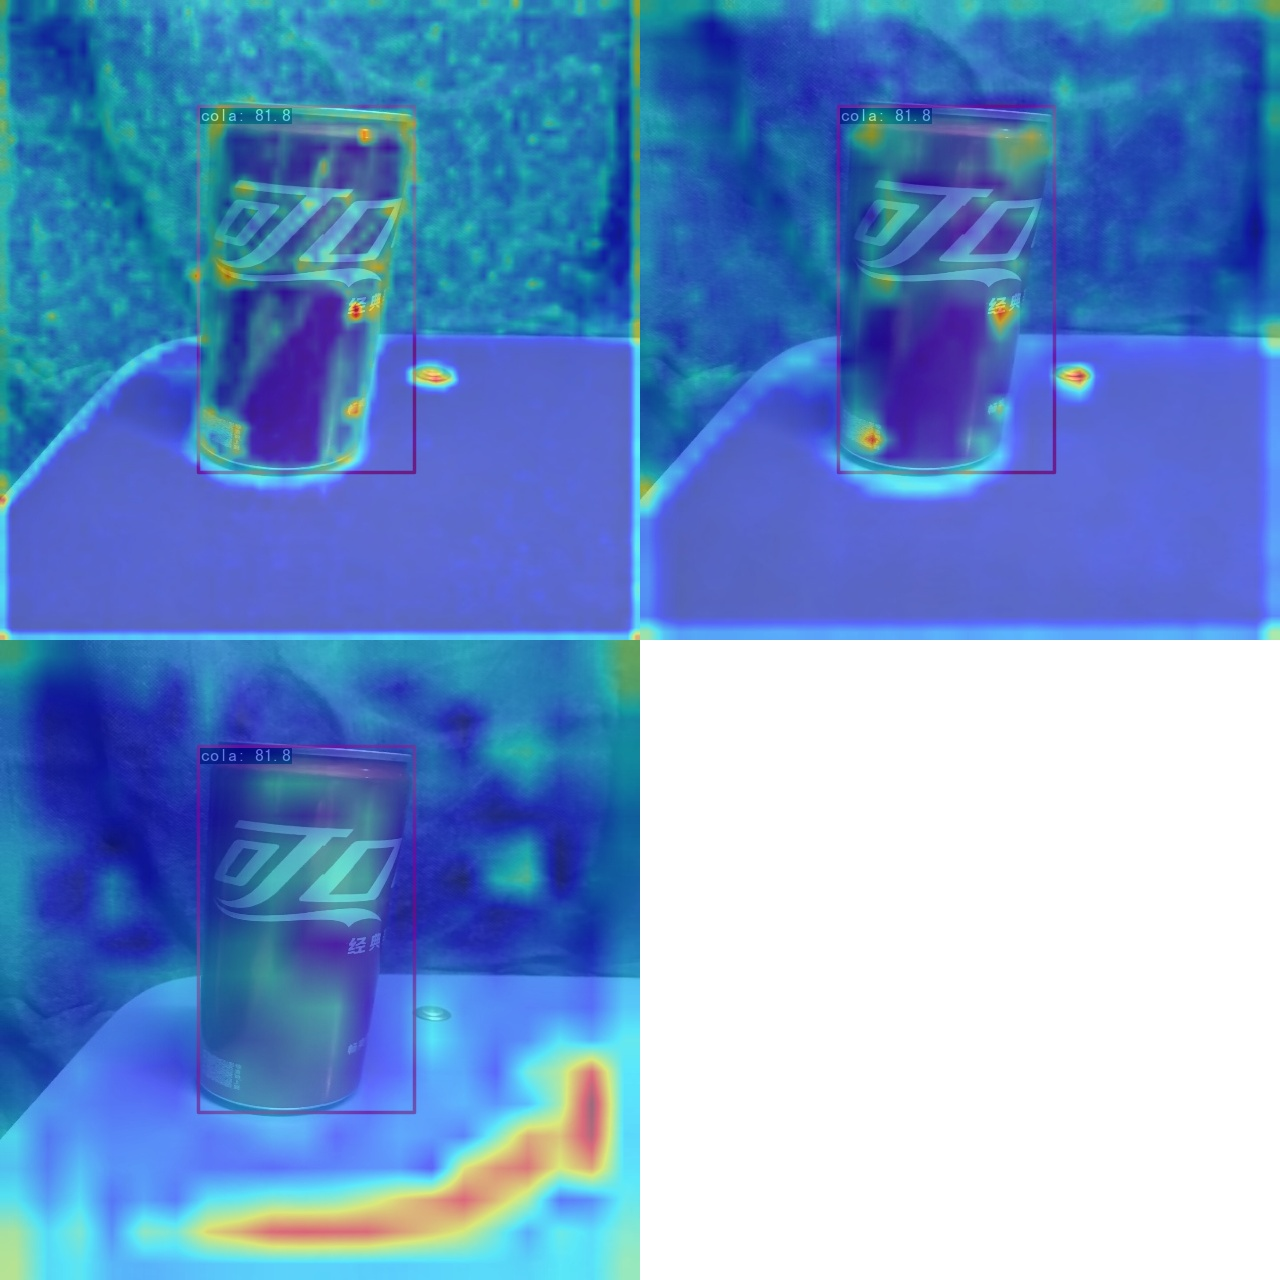

In [9]:
from PIL import Image
Image.open('output/resized_cola.jpg')   

resized_cola.jpg
../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py
../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
06/11 22:35:47 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/11 22:35:47 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/11 22:35:51 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until

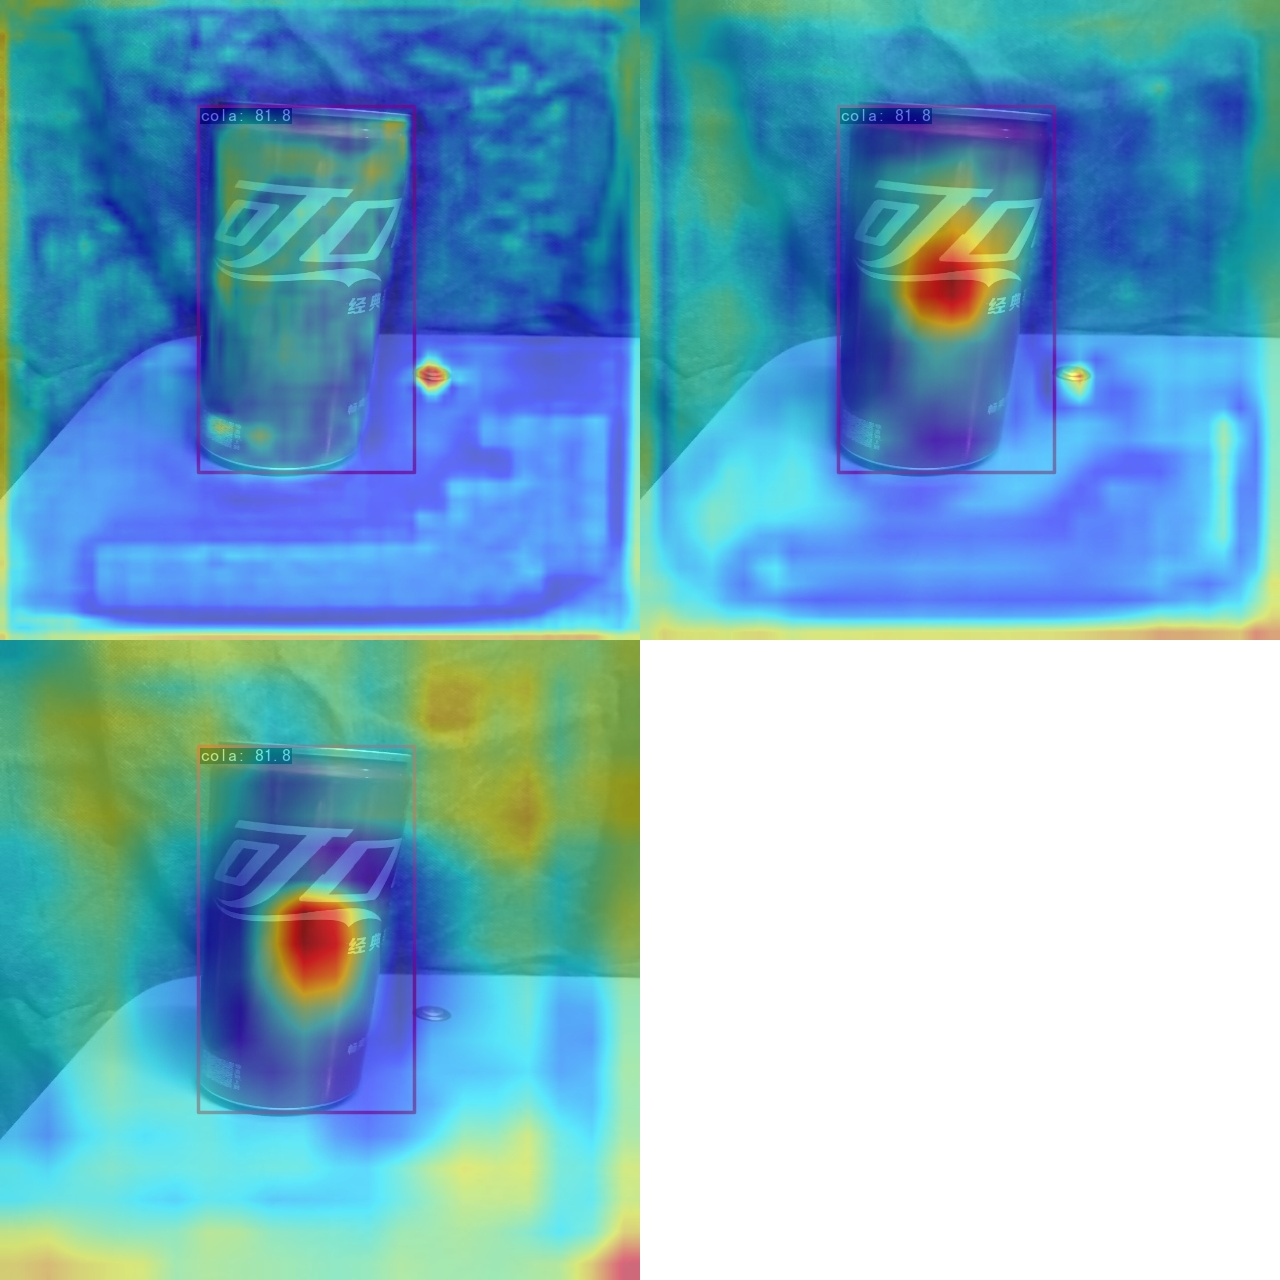

In [10]:
# 可视化 neck 输出的 3 个通道
!python demo/featmap_vis_demo.py \
      resized_cola.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean
Image.open('output/resized_cola.jpg') 

In [ ]:
# 安装grad-cam
# !pip install "grad-cam"

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

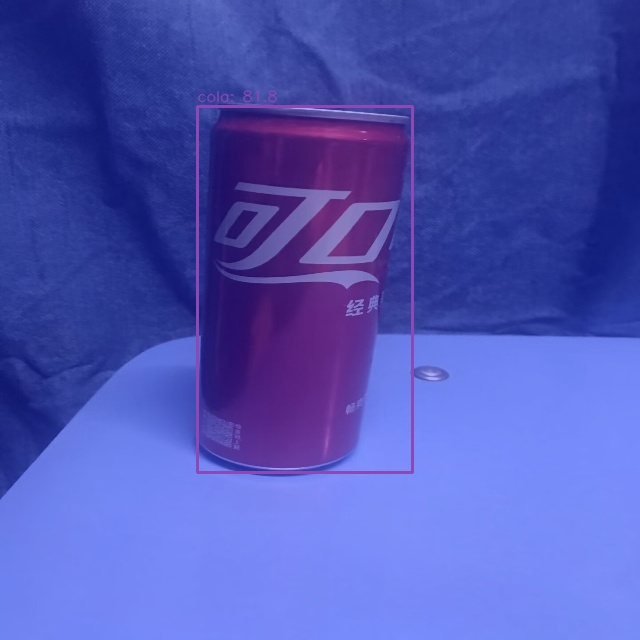

In [11]:
# 查看 neck 输出的最小输出特征图的 Grad CAM
!python demo/boxam_vis_demo.py \
      resized_cola.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[2]
Image.open('output/resized_cola.jpg')   

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

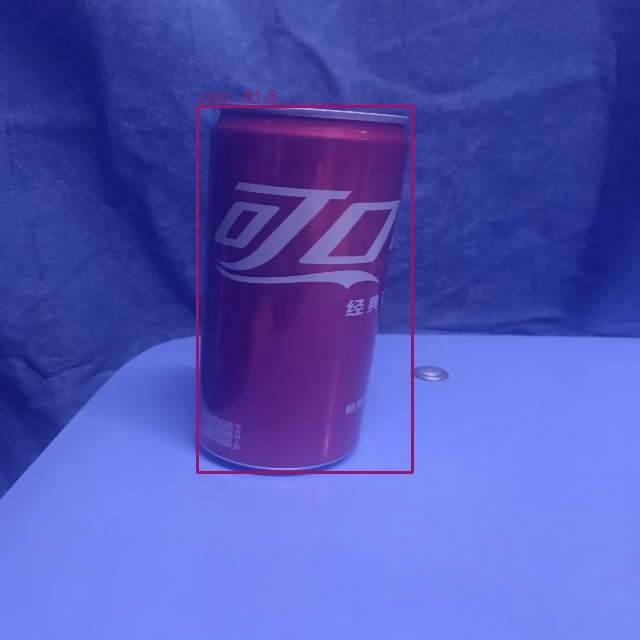

In [12]:
# 查看 neck 输出的最大输出特征图的 Grad CAM
!python demo/boxam_vis_demo.py \
      resized_cola.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[0]
Image.open('output/resized_cola.jpg')   

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

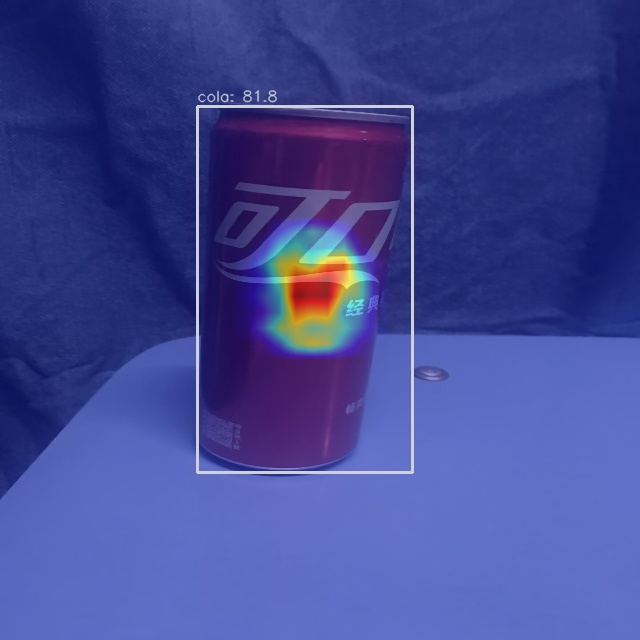

In [13]:
# 都没有查看neck 输出的中等输出特征图的 Grad CAM
!python demo/boxam_vis_demo.py \
      resized_cola.jpg \
      ../mmdetection/data/rtmdet_tiny_1xb12-40e_drink.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_drink/best_coco/bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[1]
Image.open('output/resized_cola.jpg')   